In [1]:
'''
Created by Avik Bhattacharya
CMPS 4720/6720 Homework: Implement your own classification algorithm
'''

import sys
print "Welcome to %s\n\n"%sys.version
print '===Importing the necessary libraries for the project==='
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

Welcome to 2.7.14 |Anaconda custom (64-bit)| (default, Oct  5 2017, 02:28:52) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


===Importing the necessary libraries for the project===


In [2]:
'''
Sign function is used to activate the neuron
'''
def activation(x):
    if x>1:
        return 1
    else:
        return 0

In [3]:
'''
Stochastic gradient descent used for learning weights
'''
def train_algorithm(data,n_iter,learn_rate):
    weights=[]
    '''
    The weight vector is initialised with all zeros
    '''
    for i in range(1,np.shape(data)[1]):
        weights.append(0)
    for i in range (0,n_iter):
        for k in range(0,len(data)):
            inputs=data[k][0:np.shape(data)[1]-1]
            label=data[k][np.shape(data)[1]-1:np.shape(data)[1]]
            adder=0
            for i in range (1,np.shape(data)[1]):
                adder += inputs[i-1]*weights[i-1]
            guess=activation((adder))
            error=(label-guess)
            weights=weights+learn_rate*(error*inputs)
    return weights   

In [4]:
'''
Learned weights used for sample classification using trained model
'''
def test_algorithm(data,w):
    predicted=[]
    weights=w
    for k in range(0,len(data)):
        inputs=data[k][0:np.shape(data)[1]-1]
        adder=0
        for i in range(1,np.shape(data)[1]):
            adder += inputs[i-1]*weights[i-1]
        guess=activation(adder)
        predicted.append(guess)
    return predicted

In [5]:
'''
Accuracy, TP, TN, FP, FN are evaluated
'''
def metrics(predicted, labels):
    tp=0.0
    fp=0.0
    tn=0.0
    fn=0.0
    for i in range(0,len(labels)):
        if (labels[i]==1):
            if (predicted[i]==1):
                tp+=1
            else:
                fn+=1
        if (labels[i]==0):
            if (predicted[i]==0):
                tn+=1
            else:
                fp+=1
    accuracy=(tp+tn)*1.0/(tp+tn+fp+fn)
    return accuracy,tp,tn,fp,fn

In [6]:
'''
Function to return a feature set and labels ready to train classifier 
'''
def read_source(filename):
    df1=pd.read_csv(filename, header=None)
    data=df1.values
    '''
    for loop used swap first and last column because initially
    the model was developed considering the last column to be label,
    so modified it to keep up with the pattern earlier developed
    '''
    for i in range (0,len(data)):
        temp=data[i][0]
        data[i][0]=data[i][np.shape(data)[1]-1]
        data[i][np.shape(data)[1]-1]=temp
    s=(np.shape(data)[0],np.shape(data)[1]+1)
    a=np.ones(s)
    '''
    label 1 is kept as 1
    label 0 converted to -1
    '''
    '''
    for i in range(0,len(data)):
        if (data[i][np.shape(data)[1]-1]==0):
            data[i][np.shape(data)[1]-1]=0
    '''
    '''
    padding extra 1s at x0 positions
    '''
    for i in range (0,np.shape(data)[1]):
        for j in range(0,len(data)):
            a[j][i+1]=data[j][i]
    data=a
    return data

In [7]:
'''
Plotter function
'''
def plotter(start,end,step):
    y_axis=[]
    train_data=read_source('train.txt')
    learn_rate=0.001
    for n_iter in range(start,end,step):
        w=train_algorithm(train_data,n_iter,learn_rate)
        test_data=read_source('test.txt')
        predicted=test_algorithm(test_data,w)
        labels=[]
        for i in range(0,len(test_data)):
            labels.append(test_data[i][np.shape(test_data)[1]-1])
            labels[i]=int(labels[i])
        accuracy,tp,tn,fp,fn= metrics(predicted,labels)
        y_axis.append(accuracy)
    xaxis = np.arange(start,end,step)
    fig, ax = plt.subplots()
    ax.plot(xaxis, y_axis, 'r')
    ax.set_xlabel('No. of iterations (n_iter)')
    ax.set_ylabel('Classification Accuracy')
    plt.title('Accuracy w.r.t n_iter')
    plt.savefig('n_iter vs acc.pdf')
    plt.show()
    ymax=max(y_axis)
    for i in range(start,end,step):
        if(y_axis[i]==ymax):
            n=i
    return (n)
    

# Main Code Here

===We train and test our method by varying the number of iterations===
===See the plot===


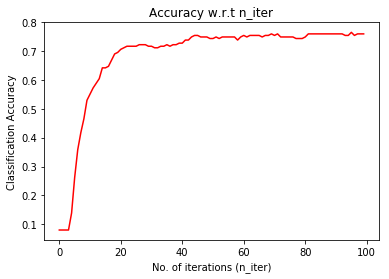

Best accuracy is obtained at n_iter = 95, so we select 95 iterations for our model

[ 0.79   0.1    0.025 -0.007 -0.091  0.071  0.005  0.064  0.095  0.145
 -0.019  0.005  0.129  0.02   0.127 -0.034 -0.015  0.092  0.084  0.036
  0.054  0.065 -0.02 ]
The model built on the basis of 95 iterations for our learning performs as below


Accuracy=76.470588 
tp=130 
tn=13 
fp=2 
fn=42

Done



In [8]:
print "===We train and test our method by varying the number of iterations===\n===See the plot==="
'''
Start, stop and step values for the plotter function
'''

start=0
end=100
step=1
n_iter=plotter(start,end,step)
print "Best accuracy is obtained at n_iter = %d, so we select %d iterations for our model\n"%(n_iter,n_iter)

train_data=read_source('train.txt')
learn_rate=0.001
w=train_algorithm(train_data,n_iter,learn_rate)
print w
test_data=read_source('test.txt')
predicted=test_algorithm(test_data,w)
labels=[]
for i in range(0,len(test_data)):
    labels.append(test_data[i][np.shape(test_data)[1]-1])
    labels[i]=int(labels[i])
accuracy,tp,tn,fp,fn= metrics(predicted,labels)
print "The model built on the basis of %d iterations for our learning performs as below\n"%(n_iter)
print "\nAccuracy=%f \ntp=%d \ntn=%d \nfp=%d \nfn=%d\n"%(accuracy*100,tp,tn,fp,fn)
print "Done\n"